In [292]:
url = 'https://www.kaggle.com/anthonypino/melbourne-housing-market'

### Using this Kaggle data create a model to predict a house's value. We want to be able to understand what creates value in a house, as though we were a real estate developer.

### Questions that need answering:

 1. What question are you trying to solve (or prove wrong) ?   
 __We are trying to predict the value of a home in Melbourne.__
 1. What kind of data do you have?  
 __Data described above, from  Domain.com.au.__
 1. What's missing from the data and how do you deal with it?  
 __Some columns have missing values, so I set them to -1.__
 1. Where are the outliers and why should we pay attention to them?  
 __I need to learn to detect, and to remove these outliers.  We did remove the NaN data.__
 1. How can you add, change, or remove features to get more out of your data?

In [293]:
# Controls
flag_to_run_rf = True
flag_to_plot_them = True
flag_to_run_correlation_matrix = True
flag_to_run_features_importance = False
flag_to_run_gradient_boosting  = False
flag_to_run_linear_regression  = False
flag_to_run_logistic_regression = False
flag_to_run_lasso_regression = False
flag_to_run_ridge_regression = False
flag_to_run_svc = False

In [294]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt

%matplotlib inline

import datetime
from sklearn import ensemble
from sklearn import datasets
from sklearn import linear_model
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import time, sys
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.model_selection import cross_val_predict, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler

In [295]:
# add this to a dictionary
# Constants
max_iterations         = 10            # set it to > 0 for determining the features inportance
random_state           = 57
test_size              = 0.10
train_size             = 0.90

begin_string = '\n'*3+'Begin'
end_string = 'End'+'\n'*3

# Regression/Classification control
Regression = True 

print("Regression = {}".format(Regression))

Regression = True


In [296]:
# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [297]:
file = 'Melbourne_housing_FULL.csv'
path = path="../../../../Datafiles/"
df = pd.read_csv((path+file))#.dropna()
print("there are {:,} entries in the data file {}".format(len(df), file))

there are 34,857 entries in the data file Melbourne_housing_FULL.csv


In [298]:
# data Cleanup
columns_to_cleanup = ['Price', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 
                      'YearBuilt', 'CouncilArea', 'Lattitude', 'Longtitude', 'Regionname',
                      'Propertycount','Distance','Postcode']
for column in columns_to_cleanup:
    print("we are now cleaning up column {}".format(column))
    df[column].fillna(-1, inplace=True)
print('we have cleaned up the dataframe.')

we are now cleaning up column Price
we are now cleaning up column Bedroom2
we are now cleaning up column Bathroom
we are now cleaning up column Car
we are now cleaning up column Landsize
we are now cleaning up column BuildingArea
we are now cleaning up column YearBuilt
we are now cleaning up column CouncilArea
we are now cleaning up column Lattitude
we are now cleaning up column Longtitude
we are now cleaning up column Regionname
we are now cleaning up column Propertycount
we are now cleaning up column Distance
we are now cleaning up column Postcode
we have cleaned up the dataframe.


In [299]:
#columns without the dropna on the open....
# Suburb               0
# Address              0
# Rooms                0
# Type                 0
# Price             7610
# Method               0
# SellerG              0
# Date                 0
# Distance             1
# Postcode             1
# Bedroom2          8217
# Bathroom          8226
# Car               8728
# Landsize         11810
# BuildingArea     21115
# YearBuilt        19306
# CouncilArea          3
# Lattitude         7976
# Longtitude        7976
# Regionname           3
# Propertycount        3
# dtype: int64

In [300]:
def print_timestamp_old(displaytext):    
    import sys
    import datetime
    datetime_now = str(datetime.datetime.now())
    print("{:19.19}: {} ".format(datetime_now, displaytext))

In [301]:
def print_timestamp(displaytext):    
    import sys
    import datetime
    datetime_now = str(datetime.datetime.now())
    print("{:19.19}: In: {} {} ".format(datetime_now, sys._getframe(1).f_code.co_name, displaytext))

In [302]:
df.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

In [303]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG', 'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude', 'Longtitude', 'Regionname', 'Propertycount'], dtype='object')

In [304]:
# Definine outcome and predictors.
print("the current time of start is {}".format(str(datetime.datetime.now())))

# Columns before dummies
# Suburb           0
# Address          0
# Rooms            0
# Type             0
# Price            0
# Method           0
# SellerG          0
# Date             0
# Distance         0
# Postcode         0
# Bedroom2         0
# Bathroom         0
# Car              0
# Landsize         0
# BuildingArea     0
# YearBuilt        0
# CouncilArea      0
# Lattitude        0
# Longtitude       0
# Regionname       0
# Propertycount    0

# Make the categorical variables below into enumerated categorical variables
for dummy_column in ['Type', 'Method', 'Suburb', 'Regionname', 'CouncilArea']: # Remove these for now...
    df = pd.concat([df, pd.get_dummies(df[dummy_column])], axis=1)
# X = pd.concat([X, pd.get_dummies(df['cntry'])], axis=1)
df.columns = df.columns.str.replace(' ', '')

y = df['Price']
columns_excluded = []
# X = df.loc[:, ~df.columns.isin(['Price', 'Address', 'SellerG', 'Date','Type', 'Method', 'Suburb', 'Regionname', 'CouncilArea'])]
X = df[['Armadale','SP','u','Brighton','Landsize','Bedroom2','Distance','Bathroom','SN','YearBuilt','EasternMetropolitan',
        'SouthernMetropolitan','t','BuildingArea','Rooms','Propertycount','Car','Toorak','h']]
# X = df[['Landsize', 'Bedroom2', 'Distance', 'Bathroom', 'YearBuilt', 'Postcode', 'BuildingArea', 'Propertycount','Car']]
columns_removed = ['W','Malvern','Canterbury','MonashCityCouncil','BoroondaraCityCouncil','Postcode' ] # score less than 19
# 
# need dummies for Type, Method, Suburb, Regionname, and CouncilArea
print("End is {}".format(str(datetime.datetime.now())))

the current time of start is 2019-06-05 22:59:52.249070
End is 2019-06-05 22:59:52.476148


In [305]:
X.sample(20)
X.head()

,Armadale,SP,u,Brighton,Landsize,Bedroom2,Distance,Bathroom,SN,YearBuilt,EasternMetropolitan,SouthernMetropolitan,t,BuildingArea,Rooms,Propertycount,Car,Toorak,h
0,0,0,0,0,126.000,2.000,2.500,1.000,0,-1.000,0,0,0,-1.000,2,4019.000,1.000,0,1
1,0,0,0,0,202.000,2.000,2.500,1.000,0,-1.000,0,0,0,-1.000,2,4019.000,1.000,0,1
2,0,0,0,0,156.000,2.000,2.500,1.000,0,1900.000,0,0,0,79.000,2,4019.000,0.000,0,1
3,0,0,1,0,0.000,3.000,2.500,2.000,0,-1.000,0,0,0,-1.000,3,4019.000,1.000,0,0
4,0,1,0,0,134.000,3.000,2.500,2.000,0,1900.000,0,0,0,150.000,3,4019.000,0.000,0,1


In [306]:
# for column in X_train.columns:
#     plt.hist(X_train[column]*100, bins=40)
#     plt.xlabel(column)
#     plt.show()

In [307]:
X.dtypes
X.describe()

,Armadale,SP,u,Brighton,Landsize,Bedroom2,Distance,Bathroom,SN,YearBuilt,EasternMetropolitan,SouthernMetropolitan,t,BuildingArea,Rooms,Propertycount,Car,Toorak,h
count,34857.000,34857.000,34857.000,34857.000,34857.000,34857.000,34857.000,34857.000,34857.000,34857.000,34857.000,34857.000,34857.000,34857.000,34857.000,34857.000,34857.000,34857.000,34857.000
mean,0.007,0.146,0.209,0.013,392.141,2.122,11.185,1.005,0.038,876.235,0.126,0.340,0.103,62.574,3.031,7572.236,1.046,0.008,0.688
std,0.082,0.353,0.407,0.114,2777.986,1.934,6.789,1.282,0.191,977.756,0.331,0.474,0.304,263.981,0.970,4428.457,1.471,0.089,0.463
min,0.000,0.000,0.000,0.000,-1.000,-1.000,-1.000,-1.000,0.000,-1.000,0.000,0.000,0.000,-1.000,1.000,-1.000,-1.000,0.000,0.000
25%,0.000,0.000,0.000,0.000,-1.000,1.000,6.400,1.000,0.000,-1.000,0.000,0.000,0.000,-1.000,2.000,4385.000,-1.000,0.000,0.000
50%,0.000,0.000,0.000,0.000,218.000,3.000,10.300,1.000,0.000,-1.000,0.000,0.000,0.000,-1.000,3.000,6763.000,1.000,0.000,1.000
75%,0.000,0.000,0.000,0.000,598.000,3.000,14.000,2.000,0.000,1965.000,0.000,1.000,0.000,117.000,4.000,10412.000,2.000,0.000,1.000
max,1.000,1.000,1.000,1.000,433014.000,30.000,48.100,12.000,1.000,2106.000,1.000,1.000,1.000,44515.000,16.000,21650.000,26.000,1.000,1.000


In [308]:
X.isnull().sum()

Armadale                0
SP                      0
u                       0
Brighton                0
Landsize                0
Bedroom2                0
Distance                0
Bathroom                0
SN                      0
YearBuilt               0
EasternMetropolitan     0
SouthernMetropolitan    0
t                       0
BuildingArea            0
Rooms                   0
Propertycount           0
Car                     0
Toorak                  0
h                       0
dtype: int64

In [309]:
def plot_them():
    for column in X_train.columns:
#         plt.hist(X_train[column]*100, bins=40)
        plt.scatter(y_train, X_train[column]*100)
        plt.xlabel(column)
        plt.show()

In [310]:
def rfc_and_feature_importances(rf):    # Here we are using Random Forest classifier method to determine the top 30 features.

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, train_size=train_size)
    
    ## Fit the model on your training data.
    rf.fit(X_train, y_train) 
    
    ## And score it on your testing data.
    rf.score(X_test, y_test)

    feature_importance = rf.feature_importances_

    # Make importances relative to max importance.
    feature_importance = 100.0 * (feature_importance / feature_importance.max())
    sorted_idx = np.argsort(feature_importance)
    cols=X.columns[sorted_idx].tolist() 
    cols=cols[::-1]
    pos = np.arange(sorted_idx.shape[0]) + .5
    plt.subplot(1, 2, 2)
    plt.barh(pos, feature_importance[sorted_idx], align='center')
    plt.yticks(pos, X.columns[sorted_idx])
    plt.xlabel('Relative Importance')
    plt.title('Variable Importance')
    plt.show()
#     print("We are returning these columns {}".format(cols))
    return cols[:30] # return it sorted

In [311]:
def run_features_importance(rf,n):
# Here we will return the feature importances
    all_feature_important_columns = []
 
    for i in range(1,n):
        print_timestamp('running rfc iteration {} features importance for {} times'.format(i,n))
        columns2 = rfc_and_feature_importances(rf)
#         columns2.extend('{}'.format(i))
        all_feature_important_columns = all_feature_important_columns + columns2
    #     print("all_feature_import_columns={}".format(all_feature_important_columns))

    print("\nBOD:\nall_feature_important_columns = {}\nEOD".format(sorted(all_feature_important_columns)))
    for feature in set(all_feature_important_columns):
        print_timestamp("the NOC of feature {} in all_feature_important_columns is {}".format(feature, all_feature_important_columns.count(feature)))

In [312]:
def run_correlation_matrix():
    
    print_timestamp('Begin')
    
    # Setup the correlation matrix.
    corrmat = X.corr()
    print(corrmat)

    # Set up the subplots
    f, ax = plt.subplots(figsize=(12, 9))

    # Let's draw the heatmap using seaborn.
    sns.heatmap(corrmat, vmax=.6, square=True)
    plt.show()
    
    print_timestamp('End')

In [313]:
# Let's fit it with the RFC training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, train_size=train_size, random_state=0)
print("train_size = {}, X_train is {}, and y_train is {}".format(train_size, len(X_train), len(y_train)))
print("test_size  = {}, X_test  is {}, and y_test is {}".format(test_size, len(y_train), len(y_test)))

train_size = 0.9, X_train is 31371, and y_train is 31371
test_size  = 0.1, X_test  is 31371, and y_test is 3486


In [314]:
def run_rf(rf):
    print_timestamp('Begin run_rf part 1')
    
    ## Fit the model on your training data.
    rf.fit(X_train, y_train)   
    
    ## Let's score it with the training data set
    train_score = rf.score(X_train, y_train)
    print("Training score = {}".format(train_score))

    ## Let's score it with the test data set
    test_score = rf.score(X_test, y_test)
    
    print("Test score = {}".format(test_score))
    #Let's run cross validate score with the training data set
#     cross_val_score(rf, X_train, y_train, cv=5)
    
    print_timestamp('End run_rfr part 1')

Let's try predicting with gradient boosting classification

In [315]:
def run_gradient_boosting():

    print_timestamp('Begin')
    
    clf = ensemble.GradientBoostingClassifier(**params)

    #Let's run cross validate score with the training data set
    cross_val_score(clf, X_train, y_train, cv=5)

    loss_function = 'deviance' # could be exponential
    depth_value = 8
    params = {'n_estimators': 500,
              'max_depth': 8,
              'loss_function': loss_function,
              'max_leaf_nodes': depth_value, # 8 worked best...
              'min_samples_leaf': depth_value * 3
              ,'random_state' : random_state
             }

    clf.fit(X_train, y_train)

    predict_train = clf.predict(X_train)
    predict_test = clf.predict(X_test)
    
    print_timestamp('End')

In [316]:
def run_svc():

    print_timestamp('\n'*3+'Begin run_svc')
    
    # Let's do a linear Support Vector Classifier
    print_timestamp('Running SVC(kernel=linear')
    svm = SVC(kernel = 'linear')
    
    # Let's fit the training model
    print_timestamp('Running svm.fit')
    svm.fit(X_train, y_train)
    
    # Let's score the training set
    print_timestamp('Running svm.score for the training set')
    svm.score(X_train, y_train)
    
    # Let's score the test set
    print_timestamp('Running svm.fit for the test set')
    svm.score(X_test, y_test)

    print_timestamp('\n'*3+'End run_svc')

In [317]:
def run_logistic_regression():
    print_timestamp('\n'*3+'Begin')

    lr = LogisticRegression(C=1e20, solver='lbfgs', max_iter=1000)

    print_timestamp('Running lr.fit for the training set')
    lr.fit(X_train, y_train)
    
    print_timestamp('Running lr.fit for the training set')
    print('\nR-squared simple model training set yields:')
    print(lr.score(X_train, y_train))
    print("here comes the test set")
    print(lr.score(X_test, y_test))
    
    print_timestamp('\n'*3+'End')

In [318]:
def run_linear_regression():

    print_timestamp('\n'*3+'Begin')

    regr = linear_model.LinearRegression()

    print_timestamp('Running regr.fit for the training set')
    regr.fit(X_train, y_train)
    
    print("\nCoeffecients: \n", regr.coef_)
    print("\nIntercept: \n", regr.intercept_)
    print("\nR-squared for training data set:")
    print(regr.score(X_train, y_train))
    
    print("\nR-squared for test data set:")
    print(regr.score(X_test, y_test))
    
    print_timestamp('End run_linear_regression.\n\n')
    
    print_timestamp('\n'*3+'End')

In [319]:
def run_ridge_regression():
    # Fitting a ridge regression model. Alpha is the regularization
    # parameter (usually called lambda). As alpha gets larger, parameter
    # shrinkage grows more pronounced. Note that by convention, the
    # intercept is not regularized. Since we standardized the data
    # earlier, the intercept should be equal to zero and can be dropped.
    print_timestamp('\n'*3+'Begin')
    
    ridgeregr = linear_model.Ridge(alpha=10, fit_intercept=False) 
    ridgeregr.fit(X_train, y_train)
    print(ridgeregr.score(X_train, y_train))
#     origparacms = ridgeregr.coef_[0]
#     print(origparams)

#     ridgeregrBig = linear_model.Ridge(alpha=10, fit_intercept=False)
#     ridgeregrBig.fit(X_train2, y_train)
#     print(ridgeregrBig.score(X_train2, y_train))
#     newparams = ridgeregrBig.coef_[0, 0:len(origparams)]

#     print('\nParameter Estimates for the same predictors for the small model'
#           'and large model:')
#     compare = np.column_stack((origparams, newparams))
#     prettycompare = np.array2string(
#         compare,
#         formatter={'float_kind':'{0:.3f}'.format})
#     print(prettycompare)
    print_timestamp('\n'*3+'End')

In [320]:
def main():
    
    print_timestamp('\n'*3+'Begin')
    
    if Regression == True:
        print_timestamp("We are running with a Regression model")
    elif Regression == False:
        print_timestamp("We are running with a Classifier model")
    else:
        print_timestamp("We have failed to set the Regression variable")
        sys.exit(main())
        

    if flag_to_plot_them == True:
        plot_them()

    if flag_to_run_features_importance == True:
        
        number_of_features_to_consider = 50
        params = {'n_estimators': 100}

        if Regression == True:
            print_timestamp('We are running RandomForestRegressor')
            rf = ensemble.RandomForestRegressor(**params)
            
        else:
            print_timestamp('We are running RandomForestClassifier')
            rf = ensemble.RandomForestClassifier(**params)

        run_features_importance(rf, number_of_features_to_consider)

    if flag_to_run_correlation_matrix == True:
        run_correlation_matrix()

    if flag_to_run_rf == True:
        #     params = {}
        params = {'n_estimators': 100} 

        if Regression == True:
            rf = ensemble.RandomForestRegressor(**params)
            print_timestamp('We are running RandomForestRegressor')
        else:
            rf = ensemble.RandomForestClassifier(**params)
            print_timestamp('We are running RandomForestClassifier')

        run_rf(rf)

    if flag_to_run_gradient_boosting  == True:
        run_gradient_boosting()

    if flag_to_run_linear_regression  == True:
        run_linear_regression()

    if flag_to_run_logistic_regression == True:
        run_logistic_regression()

    if flag_to_run_svc == True:
        run_svc() 

    if flag_to_run_ridge_regression == True:
        run_ridge_regression()

    print_timestamp('End'+'\n'*3)

2019-06-05 22:59:53: In: main 


Begin 
2019-06-05 22:59:53: In: main We are running with a Regression model 


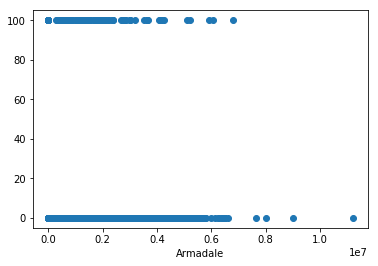

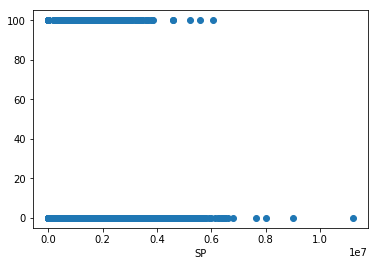

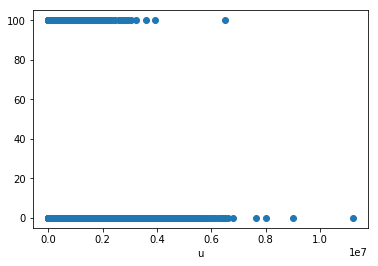

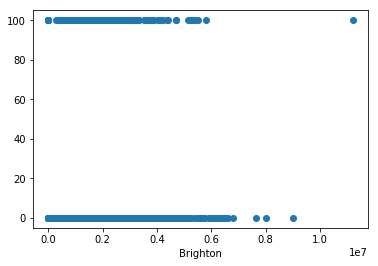

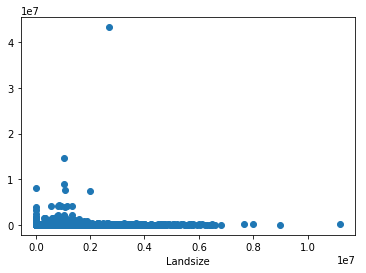

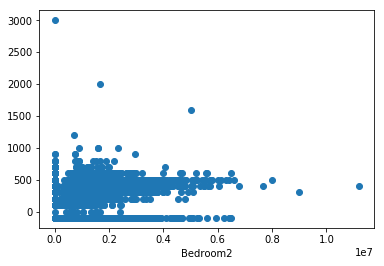

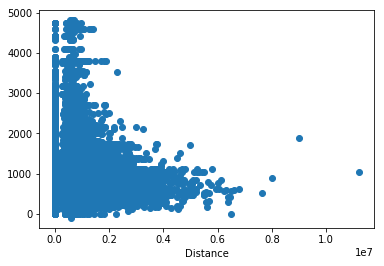

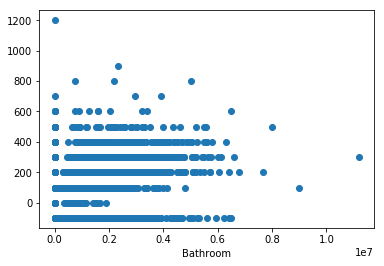

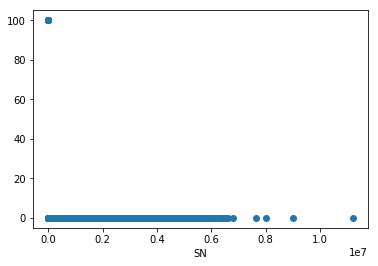

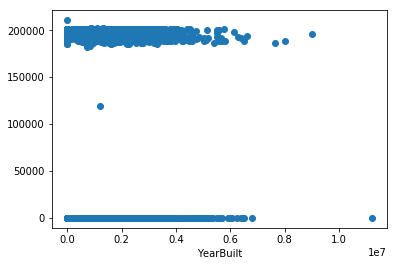

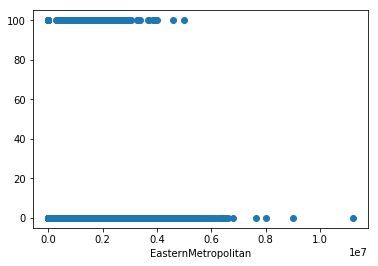

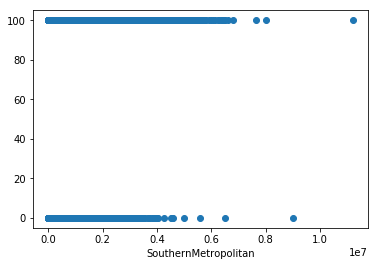

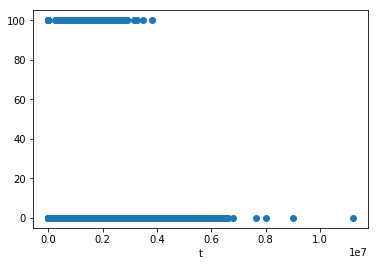

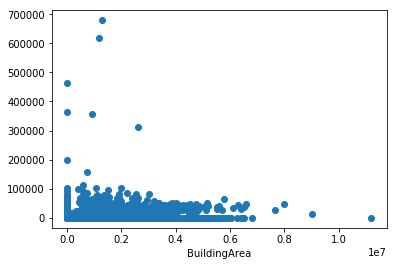

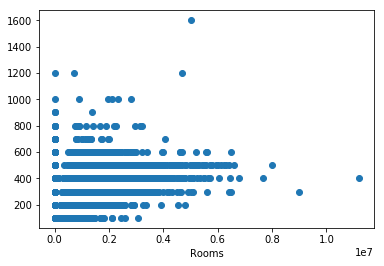

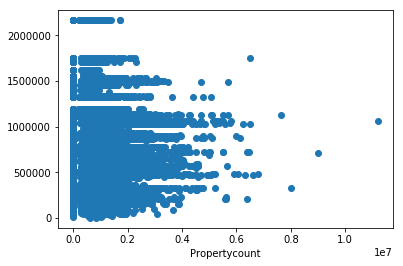

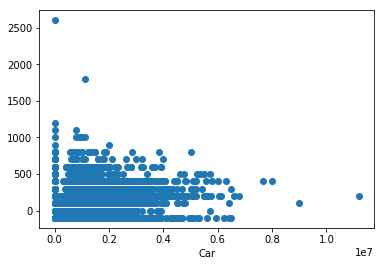

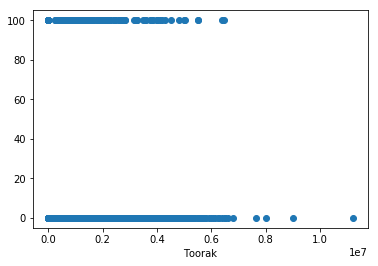

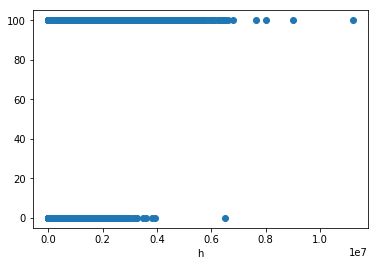

2019-06-05 23:00:00: In: run_correlation_matrix Begin 
                      Armadale     SP      u  Brighton  Landsize  Bedroom2  Distance  Bathroom     SN  YearBuilt  EasternMetropolitan  SouthernMetropolitan      t  BuildingArea  Rooms  Propertycount    Car  Toorak      h
Armadale                 1.000 -0.006  0.042    -0.010    -0.005    -0.018    -0.060    -0.007  0.004     -0.004               -0.031                 0.115 -0.011        -0.005 -0.033         -0.051 -0.018  -0.007 -0.030
SP                      -0.006  1.000  0.045     0.009    -0.008    -0.028     0.003    -0.027 -0.082      0.023               -0.023                -0.053 -0.004         0.001 -0.044         -0.017 -0.021   0.003 -0.037
u                        0.042  0.045  1.000     0.004    -0.027    -0.367    -0.227    -0.289 -0.031     -0.058               -0.078                 0.158 -0.174        -0.075 -0.538          0.082 -0.279   0.077 -0.764
Brighton                -0.010  0.009  0.004     1.000    -0.

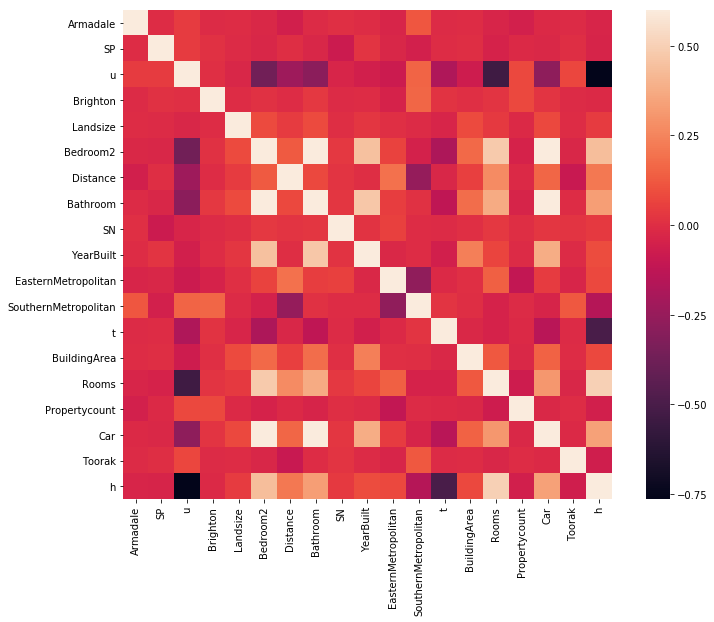

2019-06-05 23:00:01: In: run_correlation_matrix End 
2019-06-05 23:00:01: In: main We are running RandomForestRegressor 
2019-06-05 23:00:01: In: run_rf Begin run_rf part 1 
Training score = 0.8275515343668143
Test score = 0.22455219628096856
2019-06-05 23:00:11: In: run_rf End run_rfr part 1 
2019-06-05 23:00:11: In: main End


 


In [321]:
main()